# Estimation directe directe de la DFE - Sauts de taux de croissance  <a class="tocSkip">

Nous voulons observer directement les variations des taux de croissance dues aux effets combinés des mutations et de la stochasticité des mesures, et si possible corriger cette dernière afin d'obtenir une estimation directe de la DFE.

In [1]:
library("gridExtra")
library("ggplot2")

In [2]:
microMA_WT_growthRates_RMdead_NAab <- read.csv2("Modified_data/data_microMA/dataset_microMA_WT_growthRates_RMdead_NAab.csv", row.names = 1)
microMA_MutH_growthRates_RMdead_NAab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MutH_growthRates_RMdead_NAab.csv", row.names = 1)
microMA_MutT_growthRates_RMdead_NAab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MutT_growthRates_RMdead_NAab.csv", row.names = 1)
microMA_MF1_growthRates_RMdead_NAab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MF1_growthRates_RMdead_NAab.csv", row.names = 1)

In [3]:
dim(microMA_MutH_growthRates_RMdead_NAab)
head(microMA_MutH_growthRates_RMdead_NAab)

[1] 660 826

,growth.rate,growth.rate.1,growth.rate.2,growth.rate.3,growth.rate.4,growth.rate.5,growth.rate.6,growth.rate.10,growth.rate.12,growth.rate.14,⋯,growth.rate.1453,growth.rate.1454,growth.rate.1456,growth.rate.1457,growth.rate.1459,growth.rate.1463,growth.rate.1464,growth.rate.1465,growth.rate.1466,growth.rate.1474
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.03526965,0.03202591,0.02811950,0.02976484,NA,NA,0.03168793,0.03343492,NA,0.03377725,⋯,0.03168793,0.03237246,NA,NA,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,NA
4,0.03526965,0.03202591,0.02811950,0.02976484,0.03381196,0.03075045,0.03168793,0.03343492,0.03373995,0.03377725,⋯,0.03168793,0.03237246,NA,NA,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,NA
5,0.03247045,0.03202591,0.02680181,0.03056693,0.03381196,0.03075045,0.02882748,0.03343492,0.03373995,0.03377725,⋯,0.02639111,0.03237246,NA,0.03095447,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,0.03087609
6,0.03247045,0.03202591,0.02680181,0.03056693,0.03381196,0.03075045,0.02882748,0.02997074,0.03373995,0.03377725,⋯,0.02639111,0.03237246,0.03667211,0.03095447,0.02600744,0.0320605,0.02177358,0.03774099,0.03587815,0.03087609
7,0.03247045,0.03367152,0.02680181,0.03056693,0.03381196,0.03075045,0.02882748,0.02997074,0.02875688,0.02766174,⋯,0.02639111,0.03237246,0.03667211,0.03095447,0.02600744,0.0320605,0.03045276,0.03774099,0.03587815,0.03087609
8,0.03247045,0.03367152,0.02680181,0.03056693,0.03219097,0.03075045,0.02882748,0.02997074,0.02875688,0.02766174,⋯,0.02639111,0.02786493,0.03667211,0.03095447,0.02600744,0.0320605,0.03045276,NA,0.02884166,0.03087609


# Sauts bruts : W-W'

Commençons par les variations brutes du taux de croissance dans tous les canaux, en supprimant les mesures constantes correspondant aux taux de croissance moyennés sur une génération ou aux cellules mortes.

In [4]:
#get_drops_col <- function(k, dataset){
#    cur_col <- dataset[,k]
#    n <- length(cur_col)
#    # tu pourras m'expliquer comment ça marche sapply ? 
#    #res <- sapply(1:n-1,
#    #              function(i) cur_col[i+1]-cur_col[i])
#    res<-cur_col
#    for(i in 1:n-1){
#        res[i]<-cur_col[i+1]-cur_col[i]
#    }
#    return (res[res!=0])
#}
#
#get_drops <- function(dataset){
#    ncol <- dim(dataset)[2]
#    res=get_drops_col(1,dataset) # ugly : can't do better?
#    for(k in 2:ncol){
#        nouv=get_drops_col(k,dataset)
#        res=c(res,nouv)
#    }
#    return (res)
#}
#drops_MutH <- get_drops(microMA_MutH_growthRates_RMdead_NAab)

drops_MutH <- -sapply(microMA_MutH_growthRates_RMdead_NAab, diff)
drops_MutH <- drops_MutH[drops_MutH != 0 & is.finite(drops_MutH)]

length(drops_MutH)
summary(drops_MutH)
#hist(drops_MutH,breaks=5000,
#    main="Distribution of gross growth rate changes")
#hist(drops_MutH,breaks=1000,
#     xlim=c(-0.02,0.02),
#    main="Distribution of gross growth rate changes - zoom")

[1] 90971

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.951e-02 -2.558e-03  6.330e-06  4.317e-05  2.575e-03  2.350e-01 


	Shapiro-Wilk normality test

data:  drops_MutH_norm[1:5000]
W = 0.99867, p-value = 0.0003797


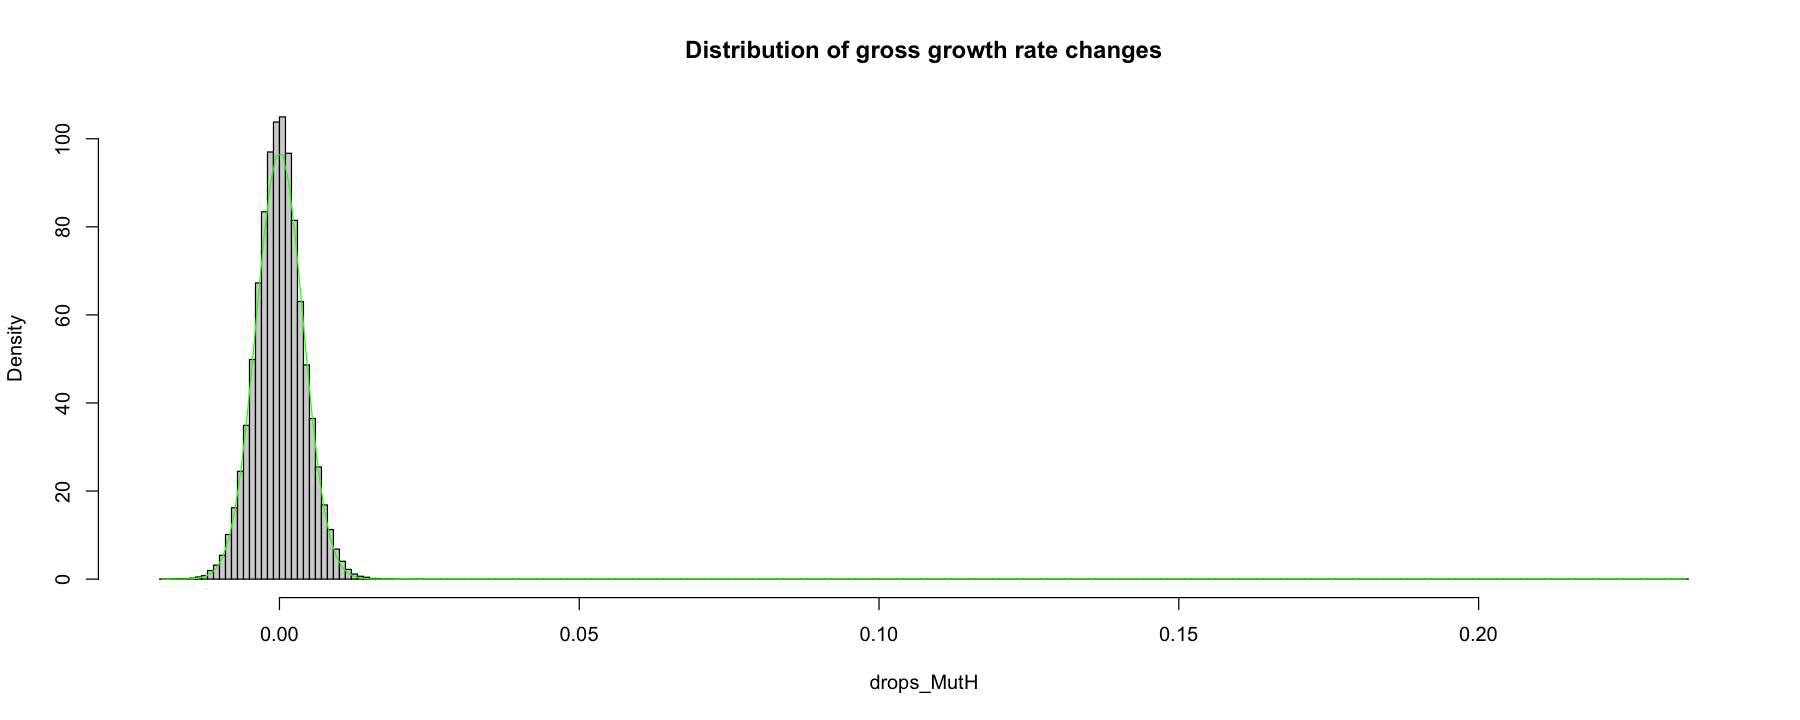

In [5]:
options(repr.plot.width = 15, repr.plot.height = 6)

limit = 0.012
drops_MutH_dty <- hist(drops_MutH, breaks=200, probability = TRUE, main="Distribution of gross growth rate changes")
drops_MutH_norm_dty <- dnorm(drops_MutH_dty$mids, mean(drops_MutH[abs(drops_MutH)<limit]), sd(drops_MutH[abs(drops_MutH)<limit]))
lines(drops_MutH_dty$mids, drops_MutH_norm_dty*0.95, col = "green")

# test de gaussianité :
drops_MutH_sd = sd(drops_MutH,na.rm=TRUE)
drops_MutH_mean = mean(drops_MutH,na.rm=TRUE)
drops_MutH_norm = (drops_MutH-drops_MutH_mean)/drops_MutH_sd

shapiro.test(drops_MutH_norm[1:5000])

$\to$ Cette répartition des chutes de taux de croissance bruts ne suit pas une distribution normale

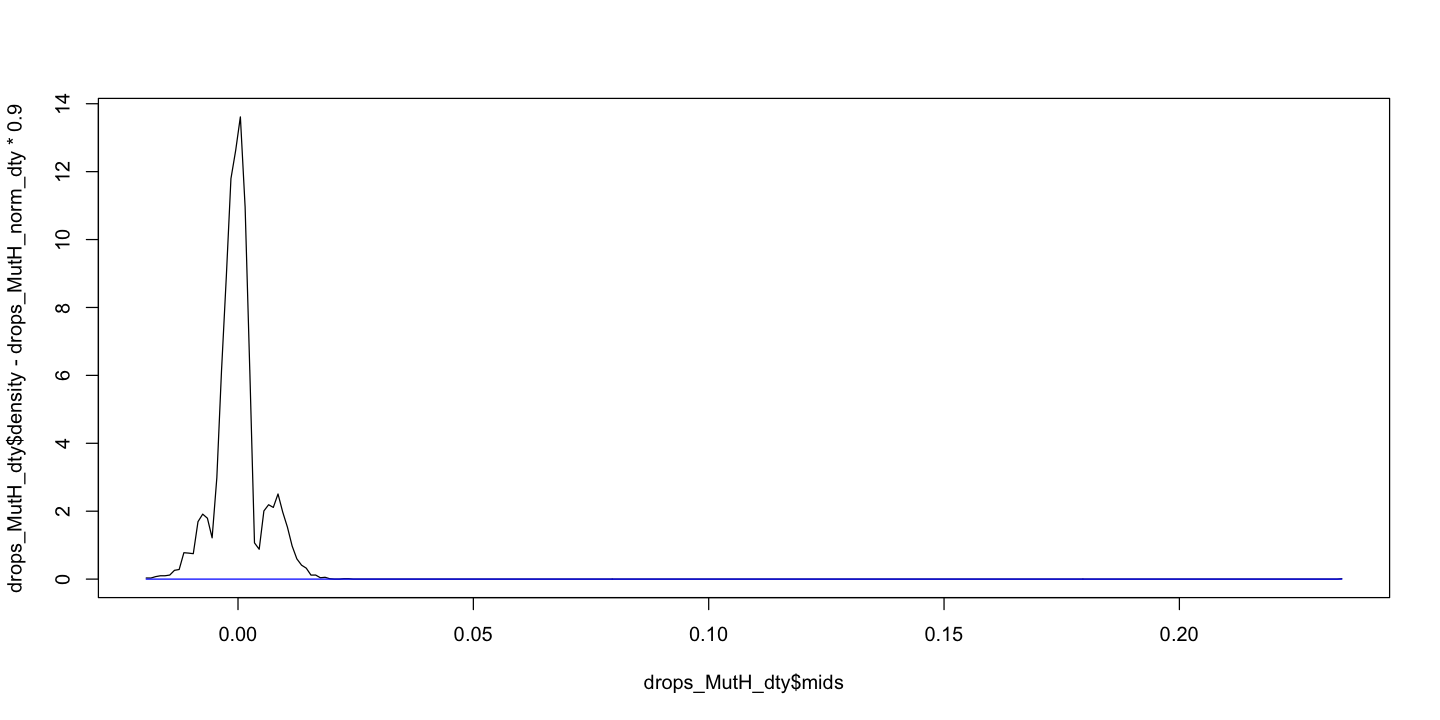

In [6]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(drops_MutH_dty$mids, drops_MutH_dty$density-drops_MutH_norm_dty*0.9, type="l")
lines(range(drops_MutH_dty$mids), c(0,0), col="blue")

# Sauts relatifs : (W-W')/W

In [7]:
wt_lim <- 5e-3   # growth rate limit before considering the cell dead
W <- microMA_MutH_growthRates_RMdead_NAab
W[W < wt_lim] <- 0   # set very small growth rates to 0 (dead cell)

reldrops_MutH <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MutH <- reldrops_MutH[reldrops_MutH != 0]    # remove constant growth rates
reldrops_MutH <- reldrops_MutH[is.finite(reldrops_MutH)]    # remove reborn dead cells (division by 0)

length(reldrops_MutH)
summary(reldrops_MutH)

[1] 90946

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.1077456 -0.0947415  0.0002597 -0.0084772  0.0870826  1.0000000 

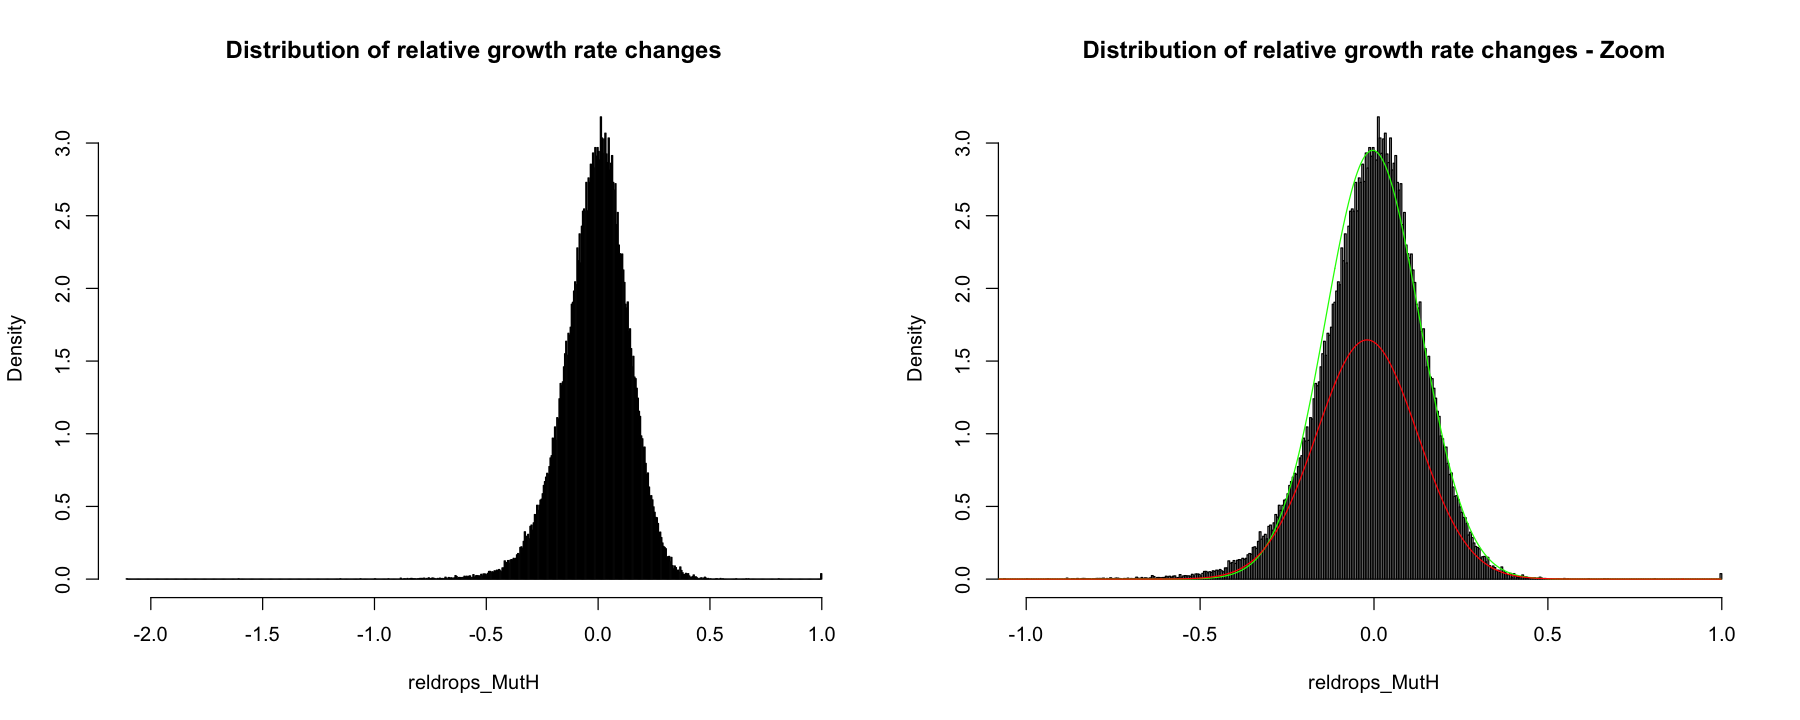

In [8]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 6)

limit = 0.4
reldrops_MutH_dty <- hist(reldrops_MutH, breaks=500, probability = TRUE, main="Distribution of relative growth rate changes")
hist(reldrops_MutH, breaks=500, xlim=c(-1, 1), probability = TRUE, main="Distribution of relative growth rate changes - Zoom")
reldrops_MutH_norm_dty <- dnorm(reldrops_MutH_dty$mids, mean(reldrops_MutH[abs(reldrops_MutH)<limit]), sd(reldrops_MutH[abs(reldrops_MutH)<limit]))
lines(reldrops_MutH_dty$mids, reldrops_MutH_norm_dty, col = "green")
limit = 1.15
reldrops_MutH_norm_dty <- dnorm(reldrops_MutH_dty$mids, -0.02, sd(reldrops_MutH[abs(reldrops_MutH)<limit]))
lines(reldrops_MutH_dty$mids, reldrops_MutH_norm_dty*0.6, col = "red")

$\to$ Cette distribution des baisses de taux de croissance relatifs n'est pas non plus normale, même en excluant les forts effets des mutations dans les queues (par exemple les mutations létales produisant le pic à 1)

Si nous avions la distribution du bruit, nous pourrions essayer de l'extraire de la distribution pour obtenir directement la DFE (comme ci-dessous pour la gaussienne rouge) :

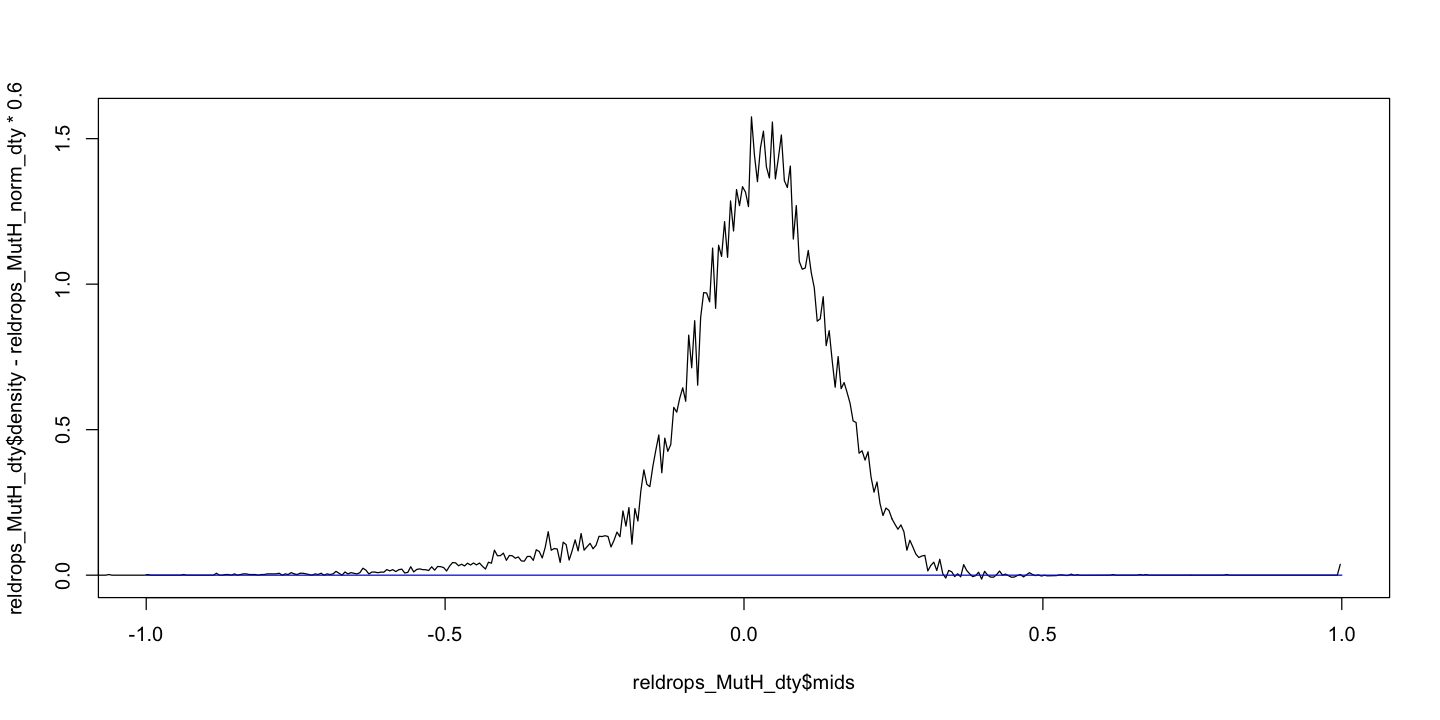

In [9]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(reldrops_MutH_dty$mids, reldrops_MutH_dty$density-reldrops_MutH_norm_dty*0.6, type="l", xlim=c(-1,1))
lines(c(-1,1), c(0,0), col="blue")

Inverser la moitié gauche de la distribution ne fonctionne pas non plus, la distribution est trop asymétrique :

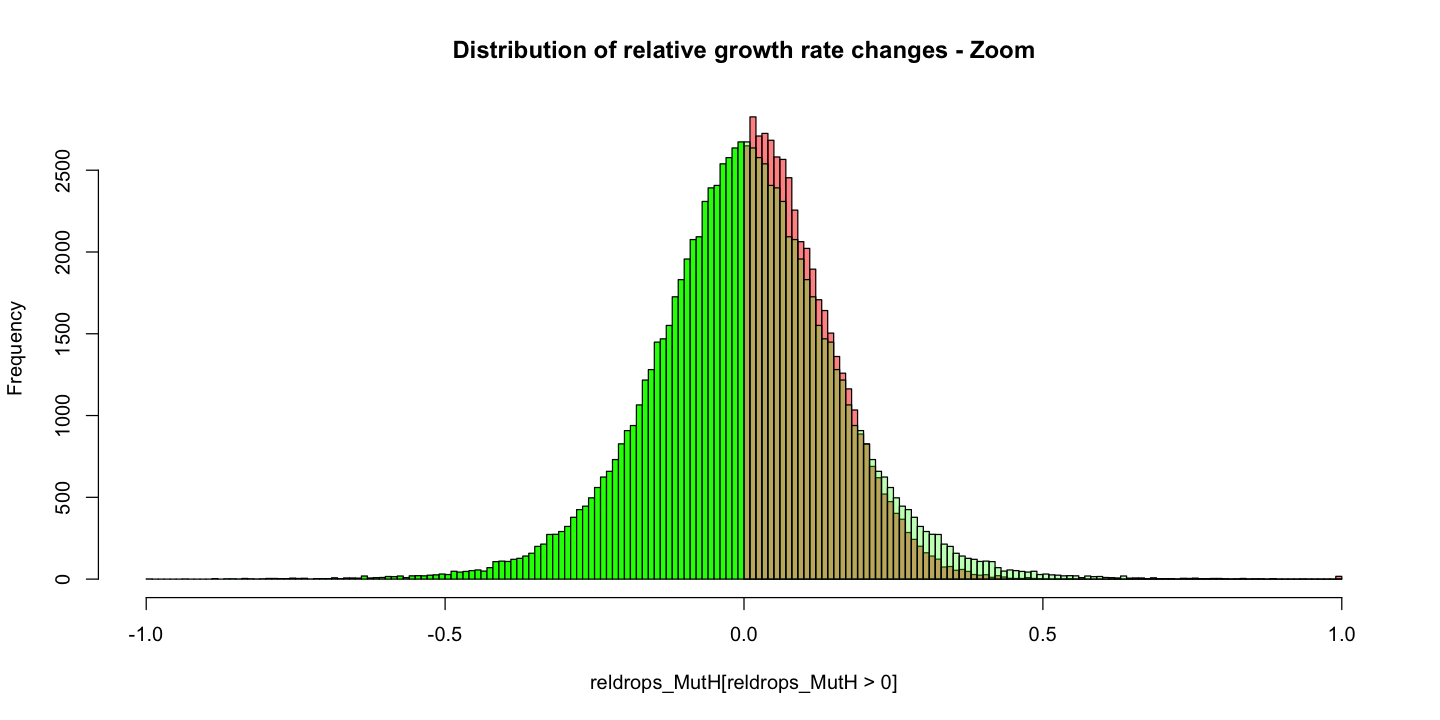

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6)
hist(reldrops_MutH[reldrops_MutH > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

# Sauts relatifs avec taux de croissance corrigés : (W-W')/W

```
microMA_WT_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_WT_growthRates_nodead_noab.csv", row.names = 1)
microMA_MutH_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MutH_growthRates_nodead_noab.csv", row.names = 1)
microMA_MutT_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MutT_growthRates_nodead_noab.csv", row.names = 1)
microMA_MF1_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MF1_growthRates_nodead_noab.csv", row.names = 1)
```

## WT

In [11]:
wt_lim <- 5e-3   # growth rate limit before considering the cell dead
W <- microMA_WT_growthRates_RMdead_NAab[1:200,]
W[W < wt_lim] <- 0   # set very small growth rates to 0 (dead cell)

reldrops_WT <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_WT <- reldrops_WT[reldrops_WT != 0]    # remove constant growth rates
reldrops_WT <- reldrops_WT[is.finite(reldrops_WT)]    # remove reborn dead cells (division by 0)

length(reldrops_WT)
summary(reldrops_WT)

[1] 25498

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-4.852866 -0.132535  0.002058 -0.018401  0.119912  1.000000 

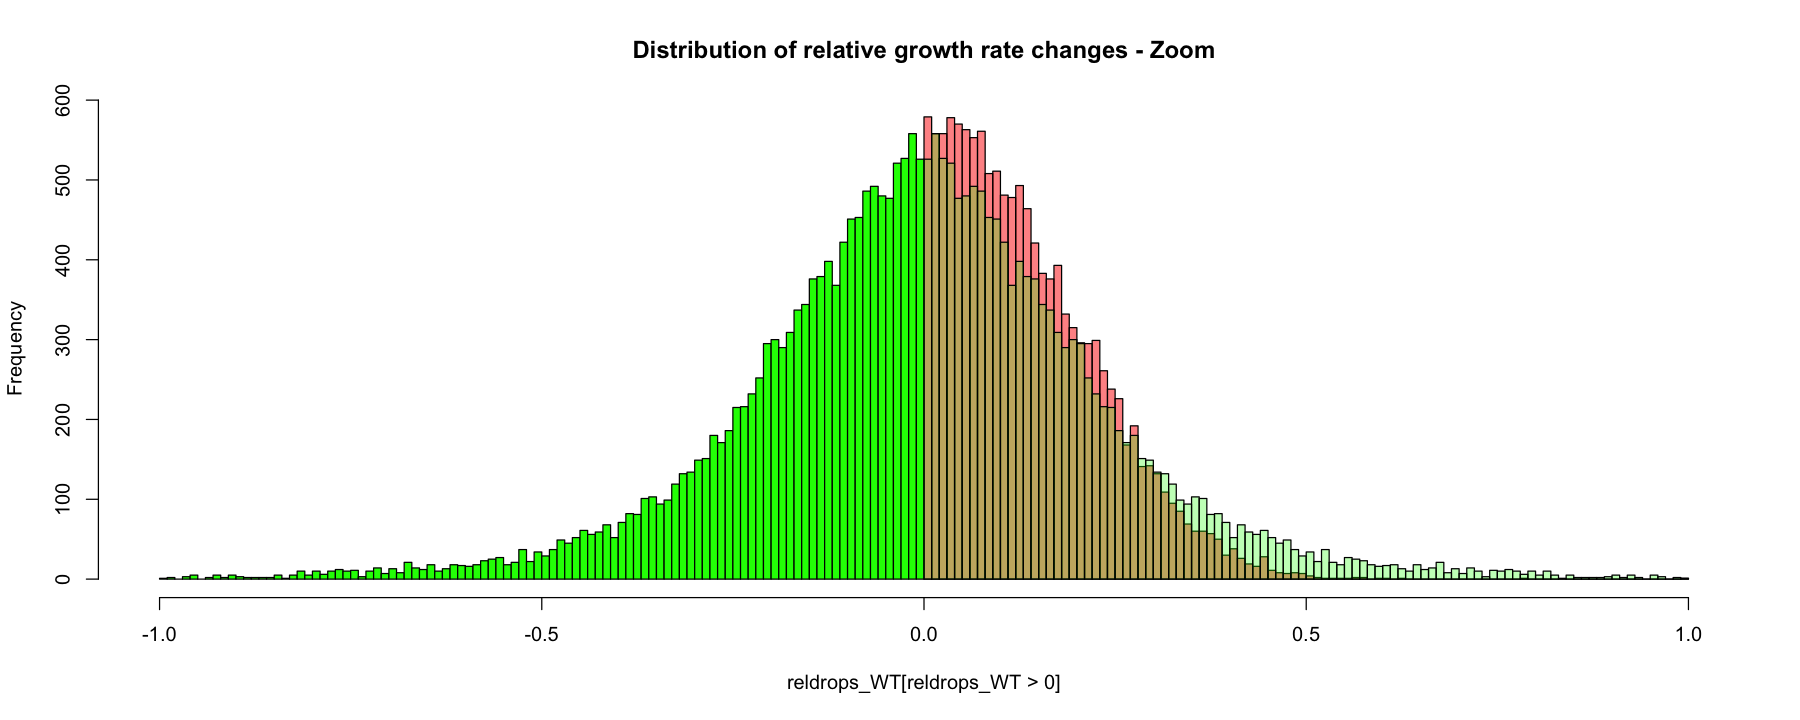

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_WT[reldrops_WT > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_WT[reldrops_WT < 0 & reldrops_WT > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_WT[reldrops_WT < 0 & reldrops_WT > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## MutH

In [13]:
wt_lim <- 5e-3   # growth rate limit before considering the cell dead
W <- microMA_MutH_growthRates_RMdead_NAab[1:200,]
W[W < wt_lim] <- 0   # set very small growth rates to 0 (dead cell)

reldrops_MutH <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MutH <- reldrops_MutH[reldrops_MutH != 0]    # remove constant growth rates
reldrops_MutH <- reldrops_MutH[is.finite(reldrops_MutH)]    # remove reborn dead cells (division by 0)

length(reldrops_MutH)
summary(reldrops_MutH)

[1] 27876

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-1.061324 -0.094081  0.001783 -0.007343  0.088679  0.674596 

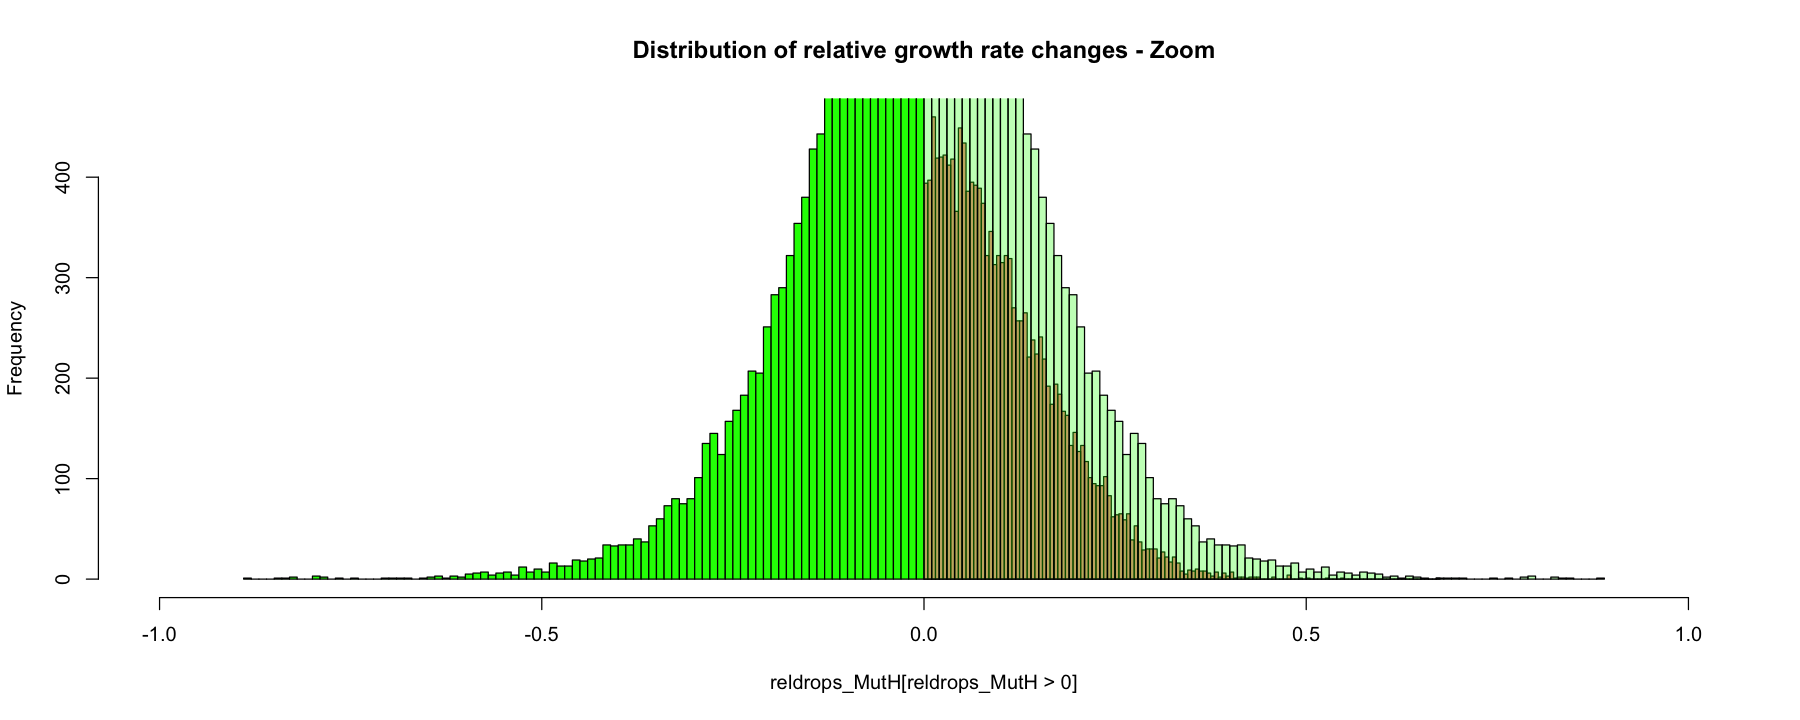

In [14]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_MutH[reldrops_MutH > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutH[reldrops_MutH < 0 & reldrops_MutH > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## MutT

In [15]:
wt_lim <- 5e-3   # growth rate limit before considering the cell dead
W <- microMA_MutT_growthRates_RMdead_NAab[1:200,]
W[W < wt_lim] <- 0   # set very small growth rates to 0 (dead cell)

reldrops_MutT <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MutT <- reldrops_MutT[reldrops_MutT != 0]    # remove constant growth rates
reldrops_MutT <- reldrops_MutT[is.finite(reldrops_MutT)]    # remove reborn dead cells (division by 0)

length(reldrops_MutT)
summary(reldrops_MutT)

[1] 29926

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.3527176 -0.0986396 -0.0001396 -0.0089406  0.0937120  0.6501099 

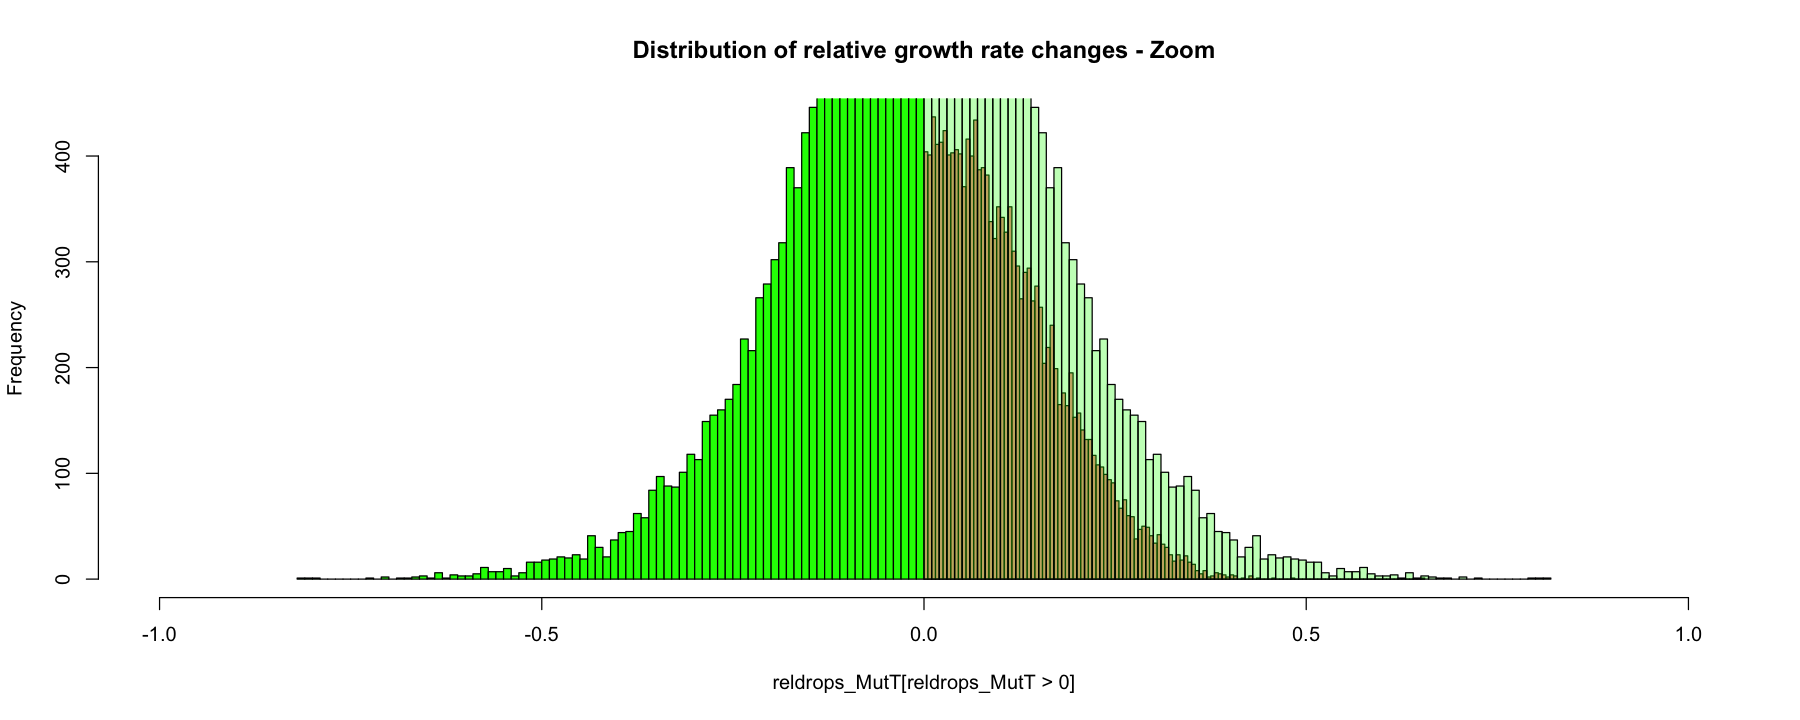

In [16]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_MutT[reldrops_MutT > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MutT[reldrops_MutT < 0 & reldrops_MutT > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MutT[reldrops_MutT < 0 & reldrops_MutT > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## MF1

In [17]:
wt_lim <- 5e-3   # growth rate limit before considering the cell dead
W <- microMA_MF1_growthRates_RMdead_NAab[1:200,]
W[W < wt_lim] <- 0   # set very small growth rates to 0 (dead cell)

reldrops_MF1 <- -sapply(W, diff)/W[-dim(W)[1],]
reldrops_MF1 <- reldrops_MF1[reldrops_MF1 != 0]    # remove constant growth rates
reldrops_MF1 <- reldrops_MF1[is.finite(reldrops_MF1)]    # remove reborn dead cells (division by 0)

length(reldrops_MF1)
summary(reldrops_MF1)

[1] 4786

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.10197 -0.05918  0.01591  0.01098  0.08418  1.00000 

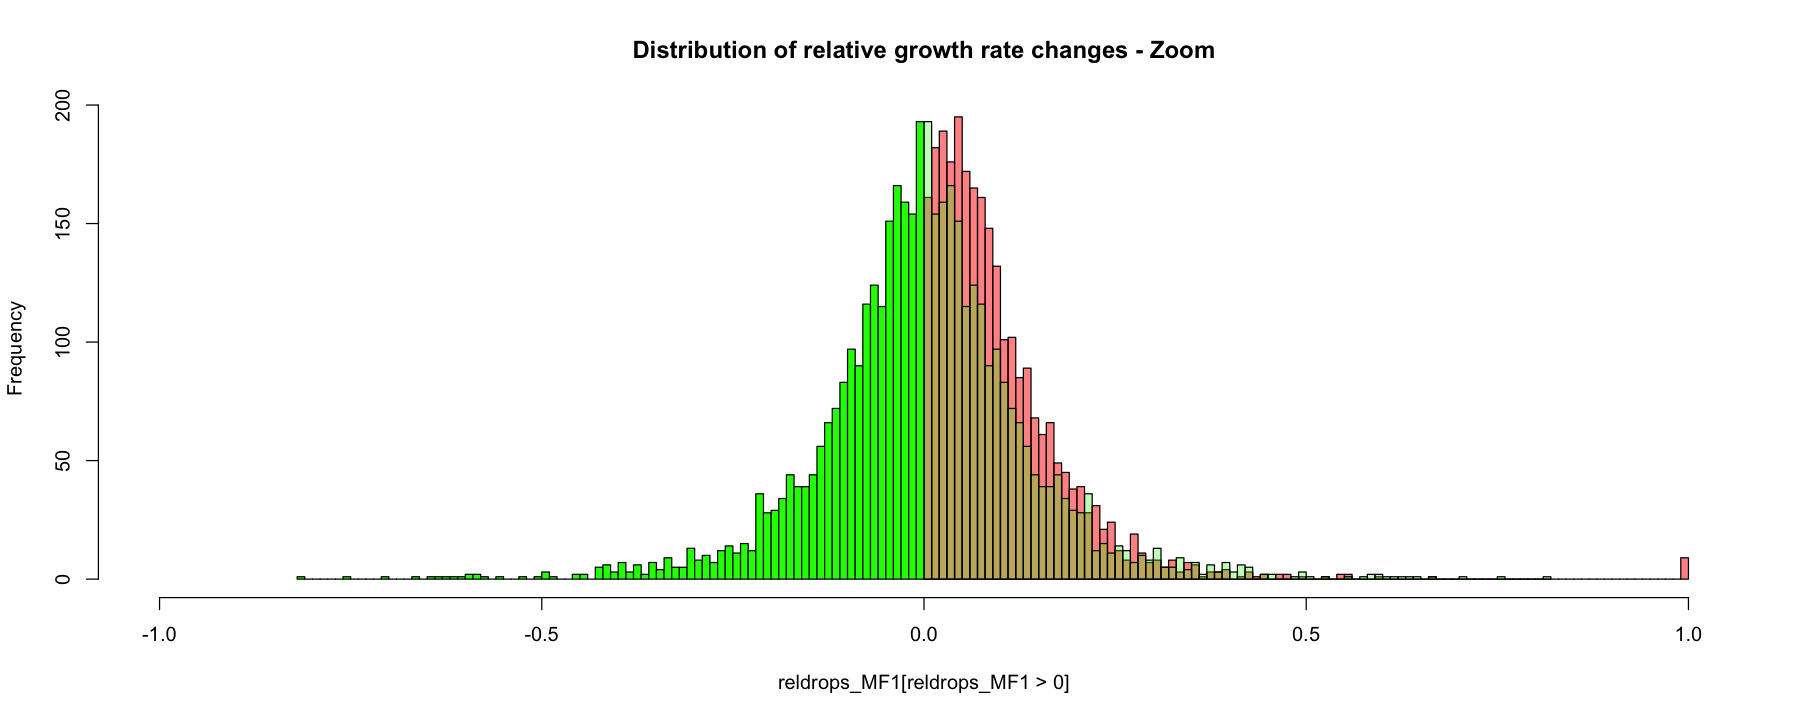

In [18]:
options(repr.plot.width = 15, repr.plot.height = 6)
hist(reldrops_MF1[reldrops_MF1 > 0], breaks=100, xlim=c(-1, 1), col=alpha("red", 0.5), main="Distribution of relative growth rate changes - Zoom")
hist(reldrops_MF1[reldrops_MF1 < 0 & reldrops_MF1 > -1], breaks=100, xlim=c(-1, 1), col="green", add=T)
hist(-reldrops_MF1[reldrops_MF1 < 0 & reldrops_MF1 > -1], breaks=100, xlim=c(-1, 1), col=alpha("green", 0.3), add=T)

## WT + MutH + MutT + MF1

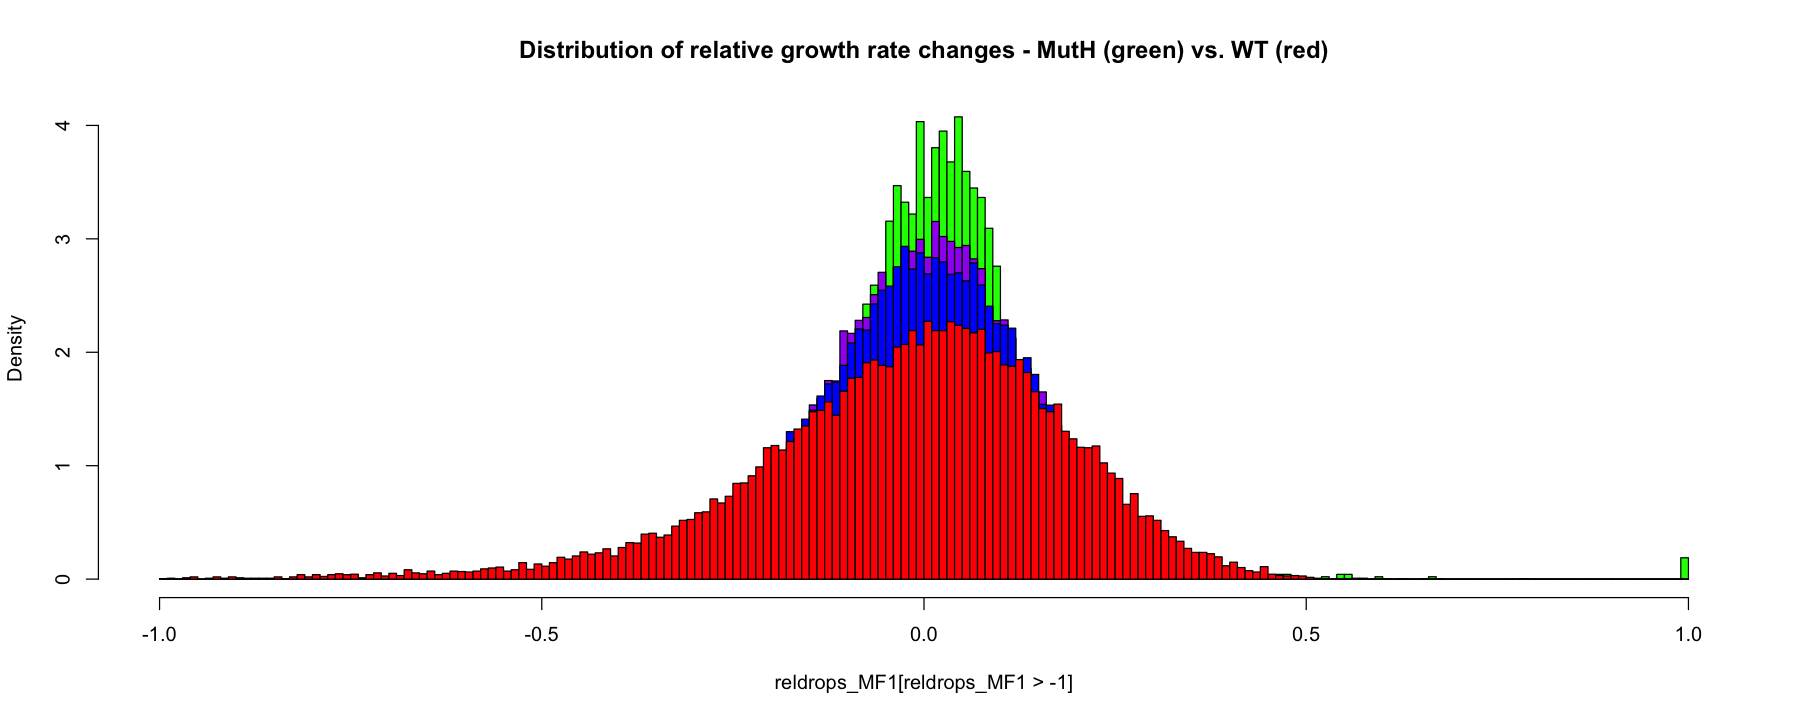

In [19]:
options(repr.plot.width = 15, repr.plot.height = 6)

breaks <- seq(-1, 1, length.out=201)

reldrops_MF1_dty <- hist(reldrops_MF1[reldrops_MF1>-1], breaks=breaks, col="green", probability = TRUE, main="Distribution of relative growth rate changes - MutH (green) vs. WT (red)")

reldrops_MutH_dty <- hist(reldrops_MutH[reldrops_MutH>-1], breaks=breaks, col="purple", probability = TRUE, add=TRUE)

reldrops_MutT_dty <- hist(reldrops_MutT[reldrops_MutT>-1], breaks=breaks, col="blue", probability = TRUE, add=TRUE)

reldrops_WT_dty <- hist(reldrops_WT[reldrops_WT>-1], breaks=breaks, col="red", probability = TRUE, add=TRUE)

### Effects evolution with increasing mutation rates

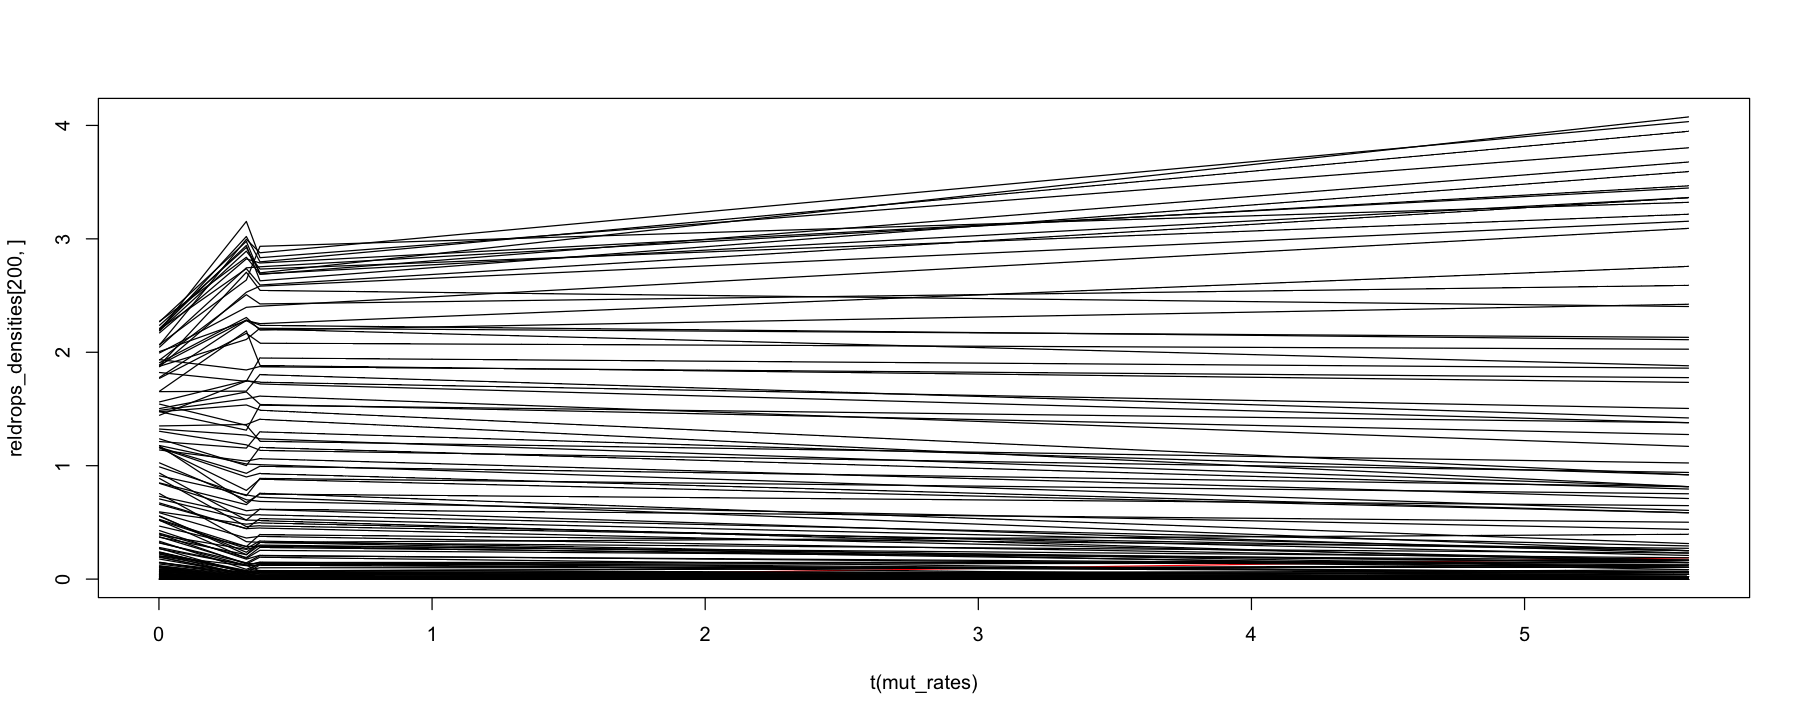

In [20]:
options(repr.plot.width = 15, repr.plot.height = 6)
reldrops_densities <- data.frame(WT = reldrops_WT_dty$density,
                                 MutH = reldrops_MutH_dty$density,
                                 MutT = reldrops_MutT_dty$density,
                                 MF1 = reldrops_MF1_dty$density)
mut_rates <- data.frame(WT = 0.002239,
                        MutH = 0.32,
                        MutT = 0.37,
                        MF1 = 5.6)

plot(t(mut_rates), reldrops_densities[200,], type="l", col="red", ylim = c(min(reldrops_densities), max(reldrops_densities)))
for (i in 1:199) {
    lines(t(mut_rates), reldrops_densities[i,])
}

Modèle linéaire simple :

$$Y = \alpha + \beta X$$

$$\beta = \frac{\sum(x_i-\bar x)(y_i-\bar y)}{\sum(x_i-\bar x)^2} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}$$

In [21]:
CovXY = apply(X = reldrops_densities, MARGIN = 1, FUN = cov, y = as.numeric(mut_rates))
VarX = var(as.numeric(mut_rates))
beta = CovXY / VarX

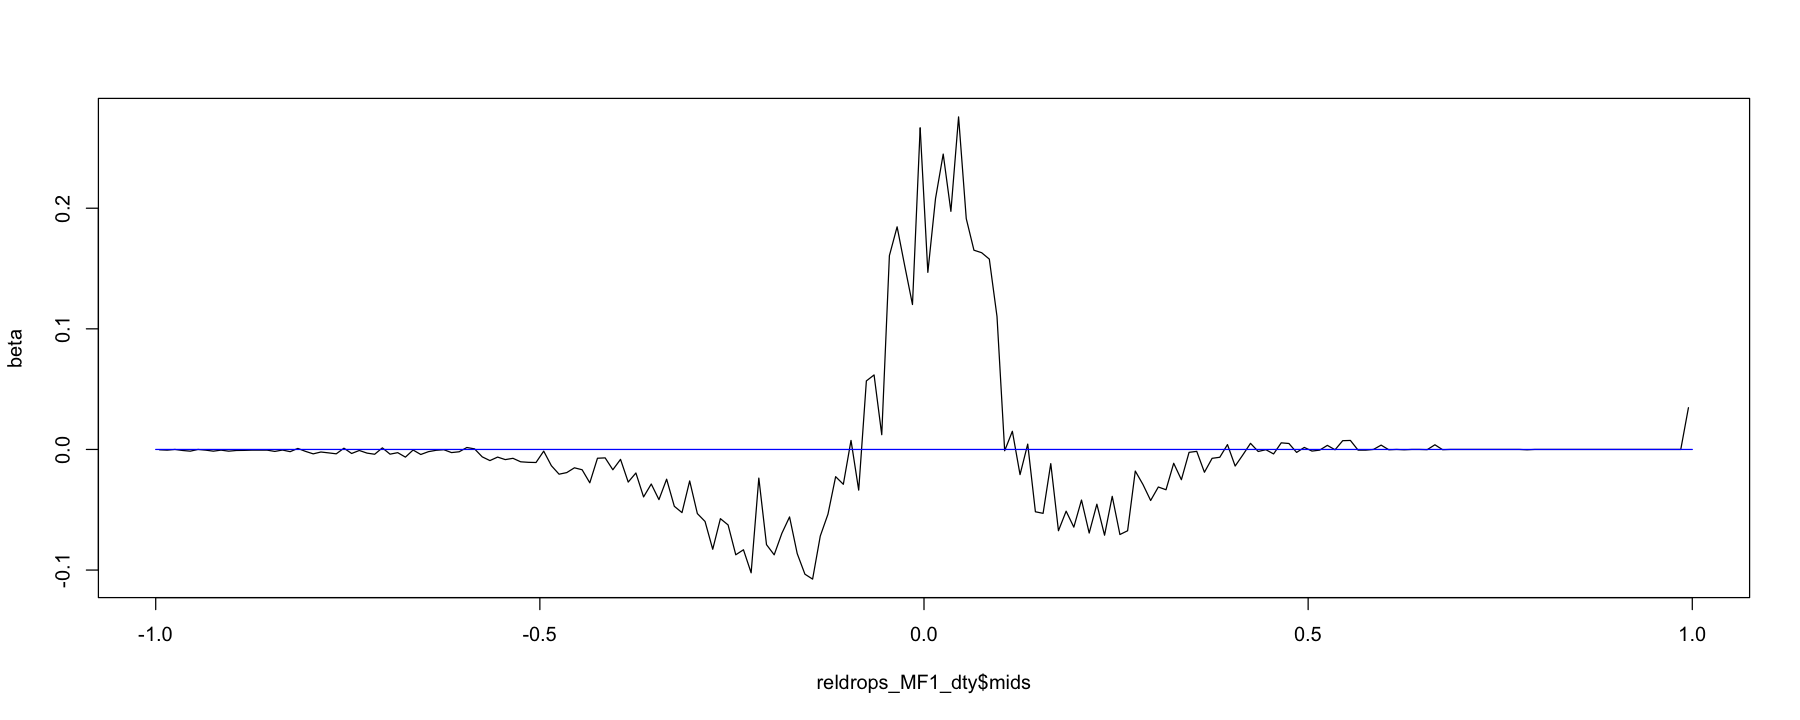

In [22]:
options(repr.plot.width = 15, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids,
     y = beta,
     type = "l")
lines(c(-1,1), c(0,0), col="blue")

$\to$ La redistribution de la masse de la distribution (i.e. la réduction du bruit), associée à l'augmentation du nombre de mutations, donne des pentes négatives pour des sauts de fitness intermédiaires. Essayons de le corrriger - c'est-à-dire enlever seulement une fraction de la distribution de WT - en se calibrant sur la partie où $s<-0.4$ (forte augmentation du taux de croissance, en supposant des mutation aussi avantageuses négligeables).

### Remove a fraction of the WT distribution: calibration on advantageous jumps

Voyons ce que cette approche donne pour MutH, MutT et MF1 à qui on retranche une fraction de WT :

[1] "Percentage of lethal mutations in MutH : 0"
[1] "Percentage of lethal mutations in MutT : 0"
[1] "Percentage of lethal mutations in MF1 : 0.23"


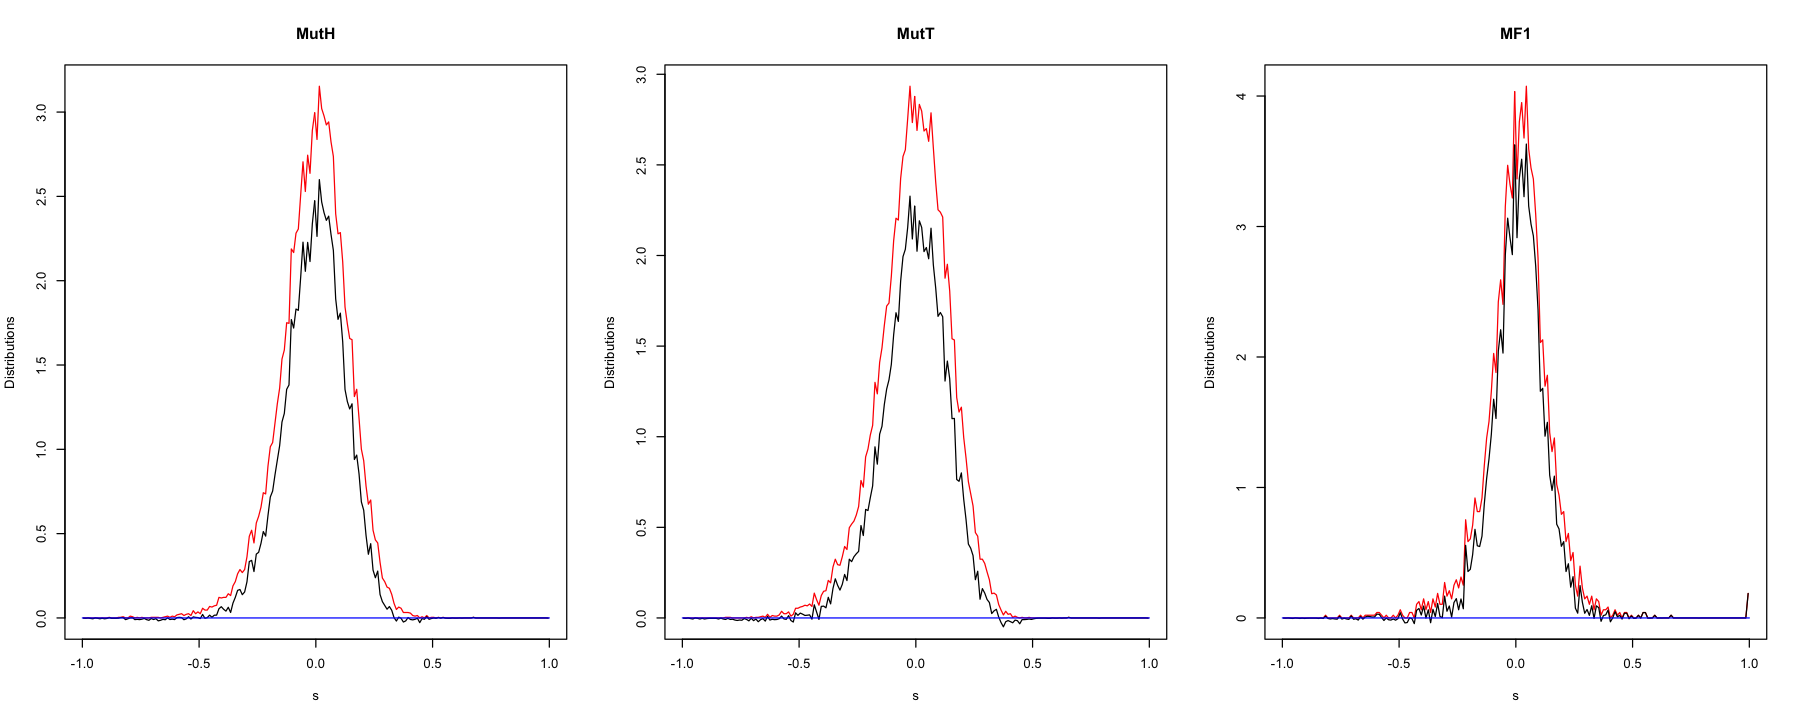

In [23]:
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow=c(1,3))
for (i in 1:3){
    X = rbind(reldrops_densities$MutH, reldrops_densities$MutT, reldrops_densities$MF1)[i,]
    DFE_XmWT <- X - mean(X[1:60])/mean(reldrops_densities$WT[1:60])*reldrops_densities$WT
    plot(x = reldrops_WT_dty$mids,
         y = X,
         type = "l", xlab="s", col="red", ylab="Distributions", main=c("MutH", "MutT", "MF1")[i])
    lines(x = reldrops_WT_dty$mids,
          y = DFE_XmWT)
    lines(c(-1,1), c(0,0), col="blue")
    print(paste("Percentage of lethal mutations in", c("MutH", "MutT", "MF1")[i], ":", round(DFE_XmWT[length(DFE_XmWT)]/sum(DFE_XmWT), 4)*100))
}

$\to$ D'après l'article on s'attend à obtenir 1% de mutations létales, ce qui montre que les reconstitutions de la DFE ci-dessus ne sont pas satisfaisantes. Et ce même pour des calibrations très différentes :

In [24]:
for (i in 1:3){
    print(c("MutH:", "MutT:", "MF1:")[i])
    print(t(data.frame(s=round(reldrops_WT_dty$mids[1:10*10], 1), prop_lethal_mut=sapply(1:10*10, function(n){
        X = rbind(reldrops_densities$MutH, reldrops_densities$MutT, reldrops_densities$MF1)[i,]
        DFE_XmWT <- X - mean(X[1:n])/mean(reldrops_densities$WT[1:n])*reldrops_densities$WT
        return(round(DFE_XmWT[length(DFE_XmWT)]/sum(DFE_XmWT), 4)*100)
    }))))}

[1] "MutH:"
                [,1] [,2] [,3] [,4] [,5] [,6] [,7]  [,8]  [,9] [,10]
s               -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.20 -0.10  0.00
prop_lethal_mut  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.01 -0.01 11.15
[1] "MutT:"
                [,1] [,2] [,3] [,4] [,5] [,6] [,7]  [,8]  [,9] [,10]
s               -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.20 -0.10  0.00
prop_lethal_mut  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.01 -0.02  0.35
[1] "MF1:"
                 [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8] [,9] [,10]
s               -0.90 -0.80 -0.70 -0.60 -0.50 -0.40 -0.30 -0.20 -0.1  0.00
prop_lethal_mut  0.19  0.21  0.21  0.22  0.23  0.23  0.25  0.28  0.4  1.79


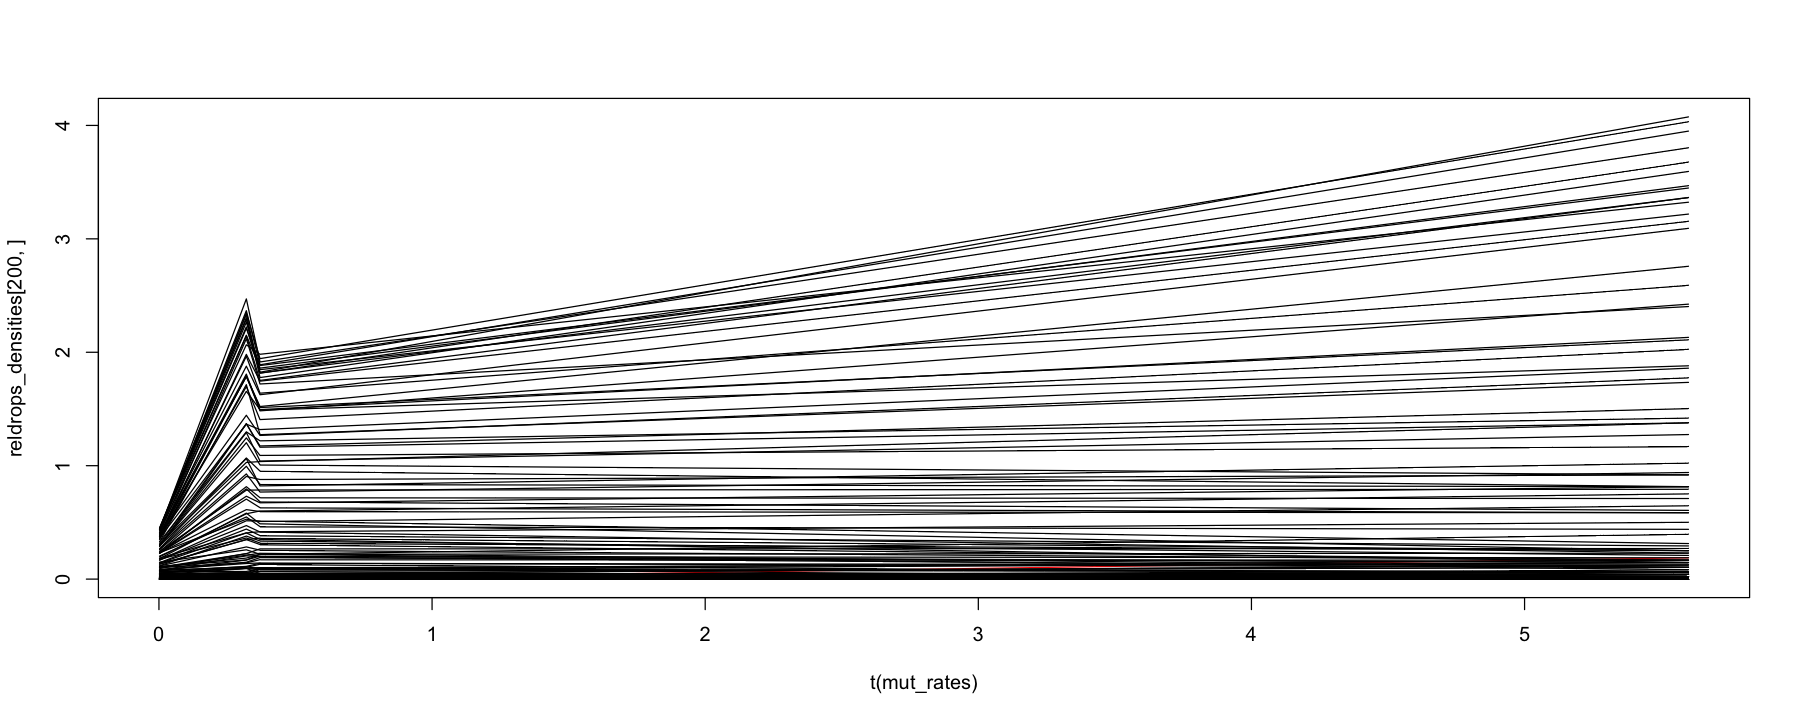

In [25]:
options(repr.plot.width = 15, repr.plot.height = 6)
reldrops_densities <- data.frame(WT = reldrops_WT_dty$density * mean(reldrops_MF1_dty$density[1:60])/mean(reldrops_WT_dty$density[1:60]),
                                 MutH = reldrops_MutH_dty$density * mean(reldrops_MF1_dty$density[1:60])/mean(reldrops_MutH_dty$density[1:60]),
                                 MutT = reldrops_MutT_dty$density * mean(reldrops_MF1_dty$density[1:60])/mean(reldrops_MutT_dty$density[1:60]),
                                 MF1 = reldrops_MF1_dty$density)
mut_rates <- data.frame(WT = 0.002239,
                        MutH = 0.32,
                        MutT = 0.37,
                        MF1 = 5.6)

plot(t(mut_rates), reldrops_densities[200,], type="l", col="red", ylim = c(min(reldrops_densities), max(reldrops_densities)))
for (i in 1:199) {
    lines(t(mut_rates), reldrops_densities[i,])
}

In [26]:
CovXY = apply(X = reldrops_densities, MARGIN = 1, FUN = cov, y = as.numeric(mut_rates))
VarX = var(as.numeric(mut_rates))
beta = CovXY / VarX

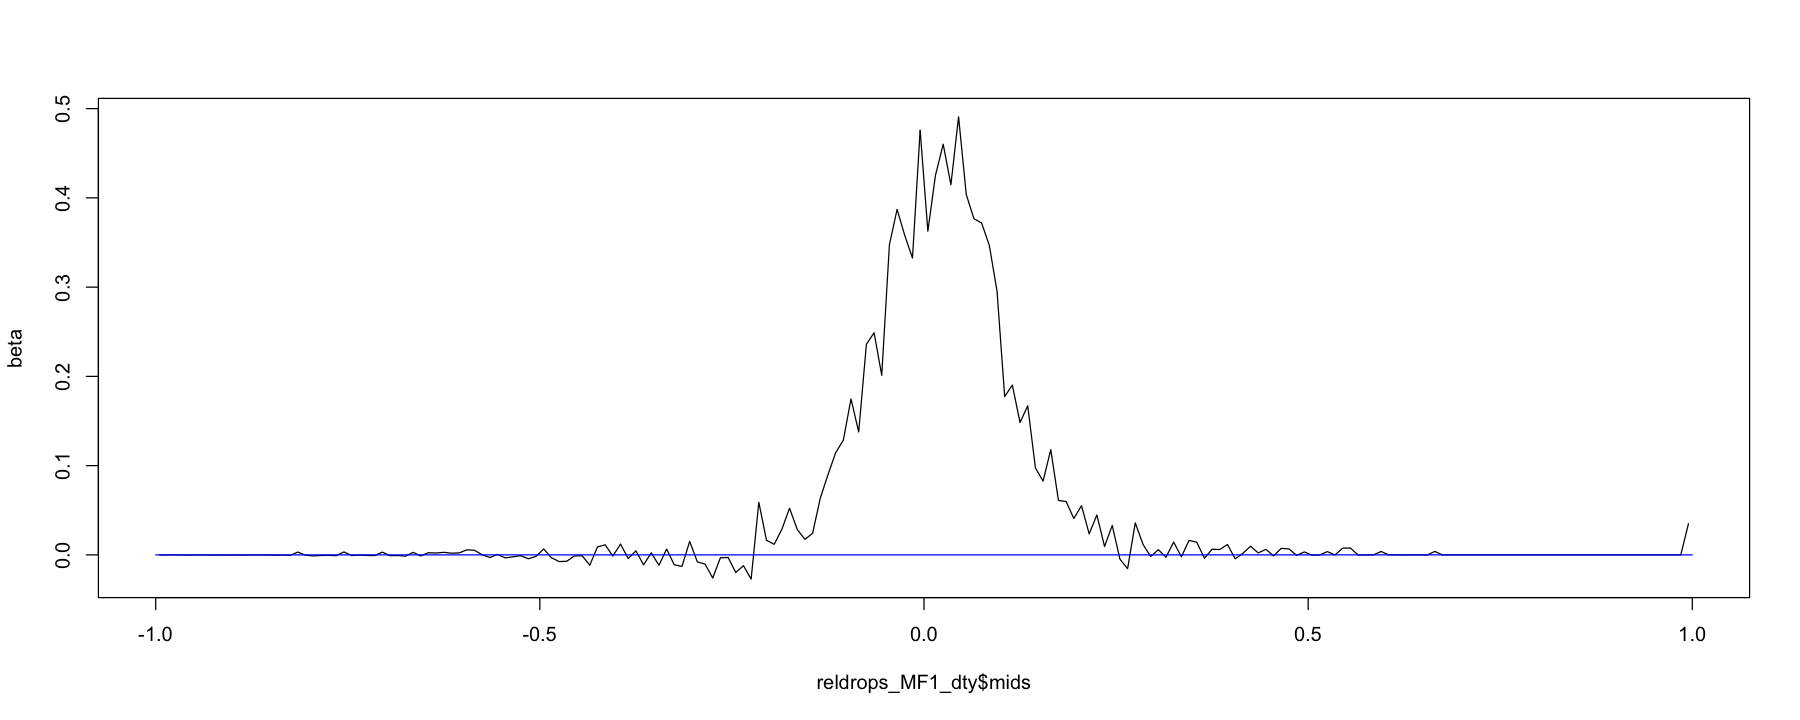

In [27]:
options(repr.plot.width = 15, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids,
     y = beta,
     type = "l")
lines(c(-1,1), c(0,0), col="blue")

In [28]:
tail(beta, 1)/sum(beta)

[1] 0.0039359

$\to$ La proportion de mutations létales est encore trop élevée.

In [29]:
library("moments")
S <- sample(x = reldrops_MF1_dty$mids, size = 10**6, prob = sapply(beta, max, 0), replace = T)
mean(S)
sd(S)/mean(S)
skewness(S)
kurtosis(S)

[1] 0.02550918

[1] 4.973123

[1] 1.33808

[1] 19.86193

$\to$ Les moments ne correspondent pas non plus.

![](Img/DFE_characterization.png)

### Other failed attempts

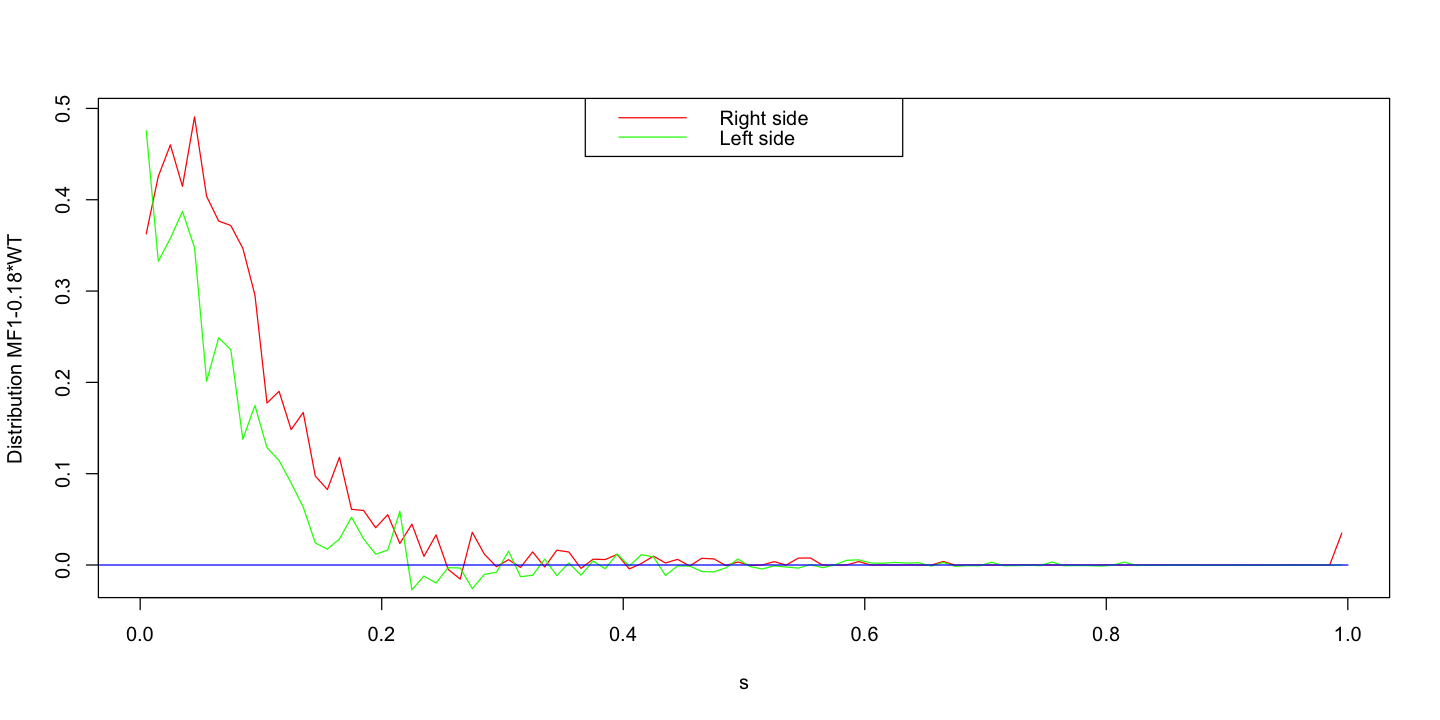

In [30]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids[reldrops_MF1_dty$mids>0],
     y = beta[reldrops_MF1_dty$mids>0],
     type = "l", col="red", xlab="s", ylab="Distribution MF1-0.18*WT")
lines(x = reldrops_MF1_dty$mids[reldrops_MF1_dty$mids>0],
      y = rev(beta[reldrops_MF1_dty$mids<0]),
      col="green")
legend("top", c("Right side", "Left side"), lty=1, col=c("red", "green"))
lines(c(-1,1), c(0,0), col="blue")

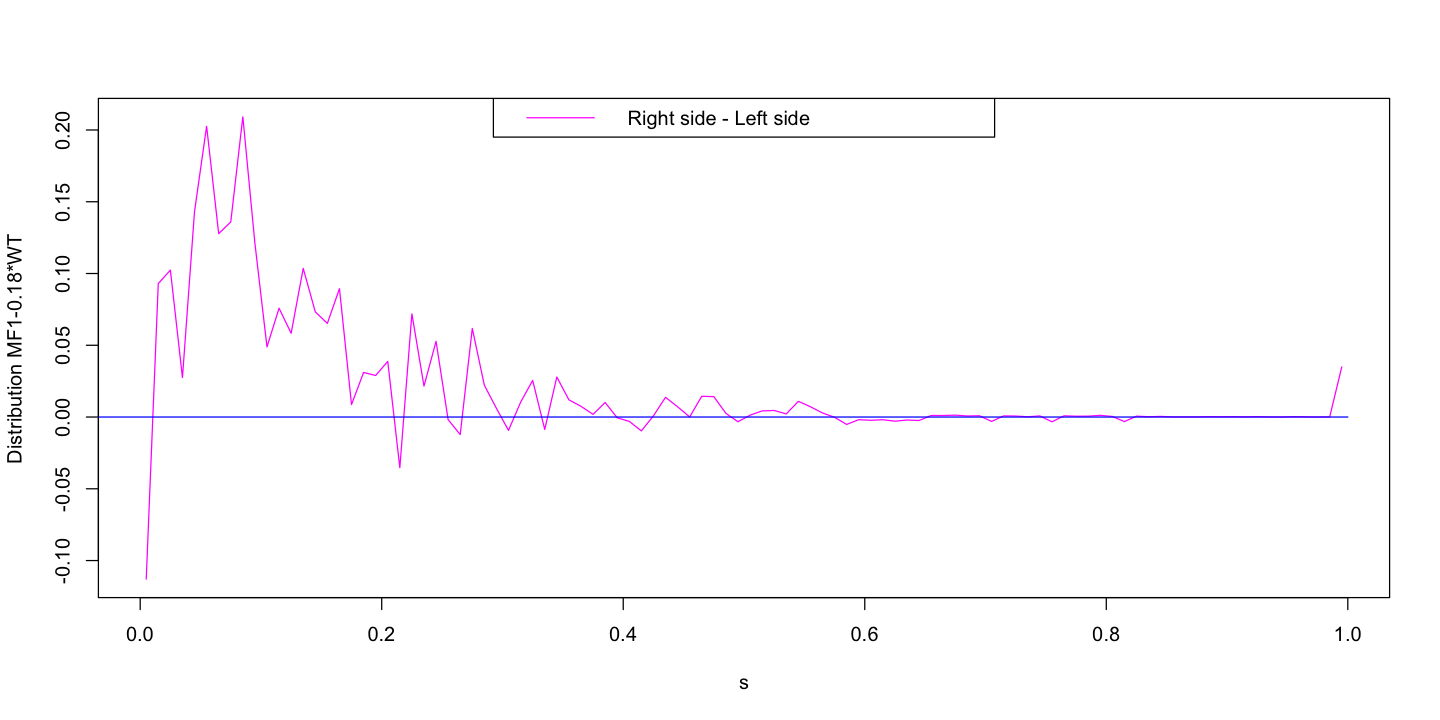

In [31]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids[reldrops_MF1_dty$mids>0],
     y = beta[reldrops_MF1_dty$mids>0] - rev(beta[reldrops_MF1_dty$mids<0]),
     type = "l", col="magenta", xlab="s", ylab="Distribution MF1-0.18*WT")
legend("top", c("Right side - Left side"), lty=1, col=c("magenta"))
lines(c(-1,1), c(0,0), col="blue")

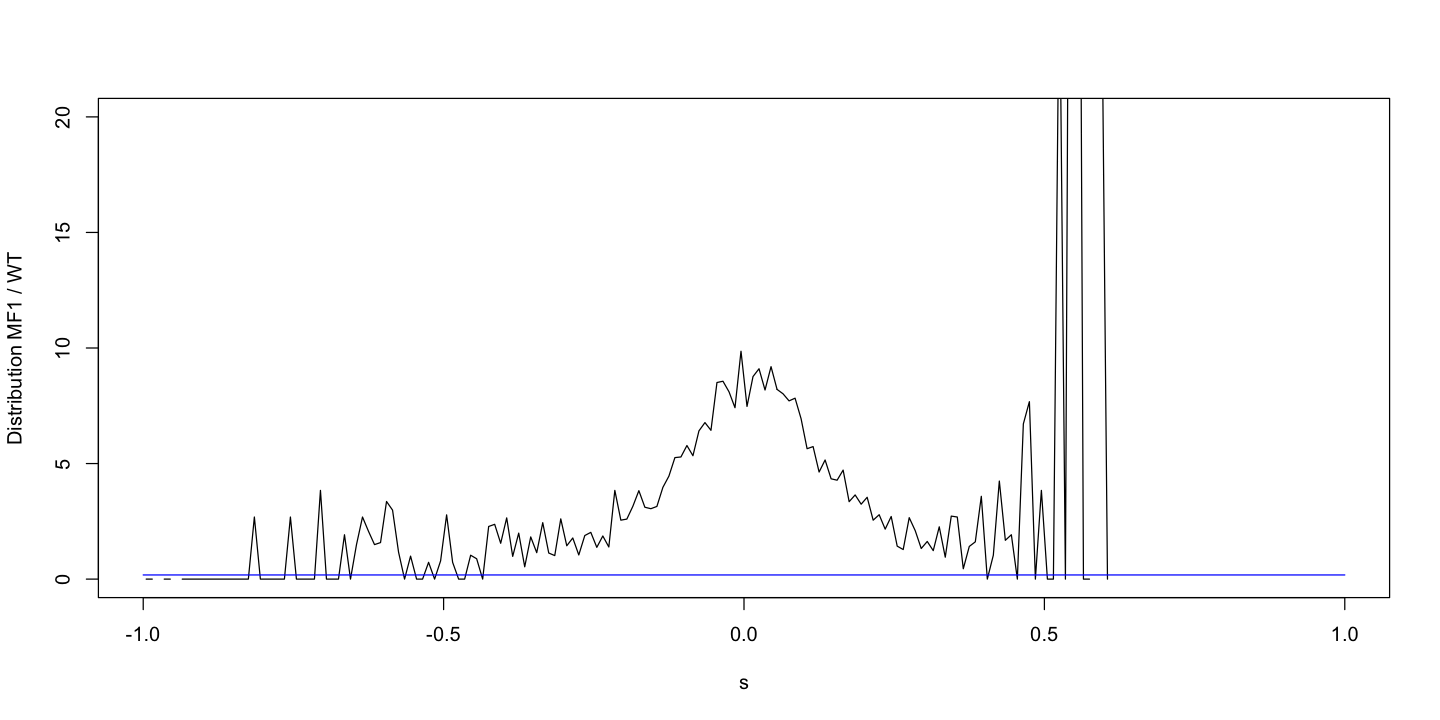

In [32]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot(x = reldrops_MF1_dty$mids,
     y = reldrops_densities$MF1/reldrops_densities$WT,
     type = "l", ylim = c(0,20), xlab="s", ylab="Distribution MF1 / WT")
lines(c(-1,1), c(0.18,0.18), col="blue")